In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [192]:
df = pd.read_excel('output_data_2020.xlsx', index_col=None)

In [193]:
df

,Unnamed: 0,date,fixing I course
0,0,2019-08-02 01:00:00,243.28
1,1,2019-08-02 02:00:00,236.99
2,2,2019-08-02 03:00:00,235.00
3,3,2019-08-02 04:00:00,230.00
4,4,2019-08-02 05:00:00,228.95
...,...,...,...
10986,10988,2020-11-01 20:00:00,189.75
10987,10989,2020-11-01 21:00:00,190.00
10988,10990,2020-11-01 22:00:00,195.26
10989,10991,2020-11-01 23:00:00,192.88


In [194]:
del df['Unnamed: 0']

In [195]:
df.columns

Index(['date', 'fixing I course'], dtype='object')

#### ARIMA Model (Auto Regression)

In [196]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [197]:
from statsmodels.tsa.stattools import adfuller

In [198]:
def ad_test(df):
    dftest = adfuller(df, autolag='AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-value: ", dftest[1])
    print("3. Num of lags: ", dftest[2])
    print("4. Num of observations used for ADF regression and critical values calculation ", dftest[3])
    print("5. Critical values: ", dftest[0])
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [232]:
df = df[df['date']>'2020-08-01 00:00:00'].reset_index(drop=True)

In [233]:
df

,date,fixing I course
0,2020-08-01 01:00:00,195.00
1,2020-08-01 02:00:00,195.00
2,2020-08-01 03:00:00,194.54
3,2020-08-01 04:00:00,192.45
4,2020-08-01 05:00:00,190.83
...,...,...
2227,2020-11-01 20:00:00,189.75
2228,2020-11-01 21:00:00,190.00
2229,2020-11-01 22:00:00,195.26
2230,2020-11-01 23:00:00,192.88


In [234]:
ad_test(df['fixing I course'])

1. ADF:  -8.47977486506108
2. P-value:  1.4033595359579365e-13
3. Num of lags:  27
4. Num of observations used for ADF regression and critical values calculation  2204
5. Critical values:  -8.47977486506108
	 1% :  -3.4333204775429715
	 5% :  -2.8628522637456255
	 10% :  -2.5674685818969634


In [209]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [223]:
#pip install "scikit_learn==0.20.4"

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Odmowa dostępu: 'c:\\users\\przem\\anaconda3\\lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


figure out order for ARIMA model

In [235]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

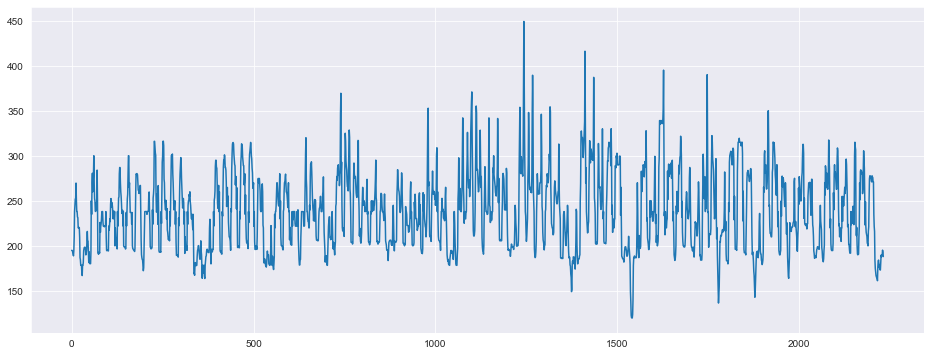

In [236]:
df['fixing I course'].plot()

In [237]:
stepwise_fit = auto_arima(df['fixing I course'], trace=True,
                         supress_warining=True)
stepwise_fit.summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0

ValueError: Could not successfully fit ARIMA to input data. It is likely your data is non-stationary. Please induce stationarity or try a different range of model order params. If your data is seasonal, check the period (m) of the data.

In [95]:
df.set_index(['date'], inplace=True)

In [97]:
df.index

DatetimeIndex(['2020-02-26 09:00:00', '2020-02-26 10:00:00',
               '2020-02-26 11:00:00', '2020-02-26 12:00:00',
               '2020-02-26 13:00:00', '2020-02-26 14:00:00',
               '2020-02-26 15:00:00', '2020-02-26 16:00:00',
               '2020-02-26 17:00:00', '2020-02-26 18:00:00',
               ...
               '2020-11-01 15:00:00', '2020-11-01 16:00:00',
               '2020-11-01 17:00:00', '2020-11-01 18:00:00',
               '2020-11-01 19:00:00', '2020-11-01 20:00:00',
               '2020-11-01 21:00:00', '2020-11-01 22:00:00',
               '2020-11-01 23:00:00', '2020-11-02 00:00:00'],
              dtype='datetime64[ns]', name='date', length=5991, freq=None)

In [172]:
prediction

4793      0.778012
4794     12.134237
4795     28.662628
4796     42.199992
4797     51.219793
           ...    
5986    241.238550
5987    246.202487
5988    228.185716
5989    220.231442
5990    201.337352
Length: 1198, dtype: float64

C:\Users\Przem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Przem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Przem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


TypeError: index type not supported

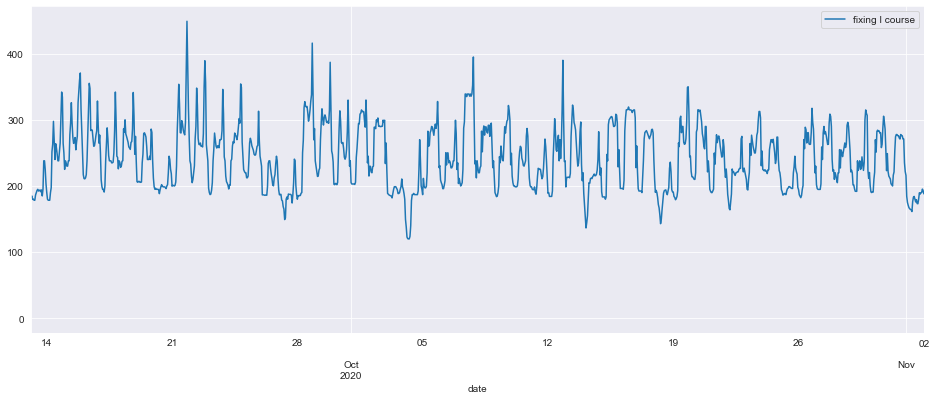

In [171]:
df.isnull().values.any()
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(16,6))
fig, ax = plt.subplots()
#ax = df.plot(ax=ax)

model = AutoReg(df['fixing I course'], 30)
model_fit = model.fit()

train_df = df.iloc[:round(len(df) * 0.8)]
test_df = df.iloc[round(len(df) * 0.8):]

train_model = AutoReg(train_df['fixing I course'], 500).fit(cov_type='HC0')
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
prediction_df = pd.DataFrame(prediction, columns=['predict fixing I course'])
ax = test_df.plot(ax=ax)
ax = prediction_df.plot(ax=ax)

In [166]:
prediction

4793      1.854365
4794      8.862322
4795     24.178352
4796     42.643212
4797     61.858527
           ...    
5986    210.388035
5987    224.036623
5988    210.144951
5989    225.771013
5990    219.150507
Length: 1198, dtype: float64

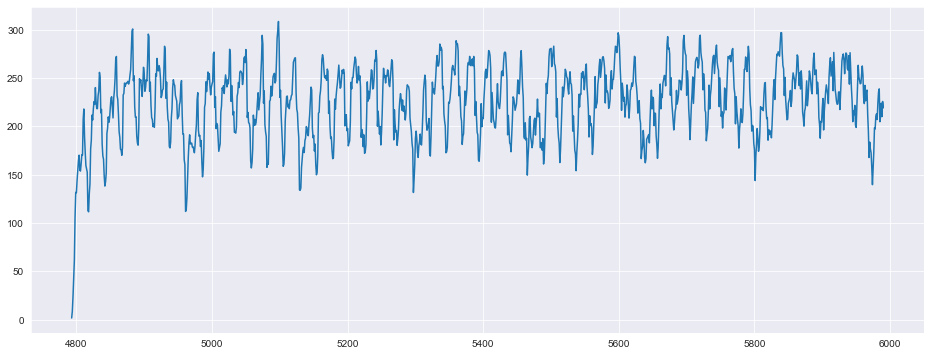

In [168]:
prediction_df['predict fixing I course'].plot()

In [163]:
ax = prediction_df = 


SyntaxError: invalid syntax (<ipython-input-163-6b7ce74cfec7>, line 1)

In [150]:
test_df

,fixing I course
date,
2020-09-13 03:00:00,183.05
2020-09-13 04:00:00,184.94
2020-09-13 05:00:00,179.73
2020-09-13 06:00:00,180.12
2020-09-13 07:00:00,178.45
...,...
2020-11-01 20:00:00,189.75
2020-11-01 21:00:00,190.00
2020-11-01 22:00:00,195.26


In [ ]:
model = AutoReg(df['fixing I course'], 30)
model_fit = model.fit()

train_df = df.iloc[:round(len(df) * 0.8)]
test_df = df.iloc[round(len(df) * 0.8):]

train_model = AutoReg(train_df['fixing I course'], 1198).fit(cov_type='HC0')
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)

pred = pd.DataFrame(prediction, columns=['predict fixing I course'])